# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="...")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Solution

In [5]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

def ddpg(n_episodes=1000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations 
        agent.reset()
        score = np.zeros(num_agents)   
        for t in range(max_t):
            actions = agent.act(states, True)
            #print(actions)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished      
            agent.step(t,states, actions, rewards, next_states,dones)
                
            states = next_states
            score += rewards
            if np.any(dones):
                break 
                
        avg_score = np.mean(score)
        max_score = np.max(score)
        min_score = np.min(score)
        
        scores_deque.append(avg_score)
        scores.append(score)
        
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore min: {:.2f}\tScore max: {:.2f}\tScore avg: {:.2f}'.format(i_episode, np.mean(scores_deque), min_score, max_score,avg_score))
        
        if np.mean(scores_deque) >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break  
   
    return scores

cpu


In [6]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

In [7]:
scores = ddpg()

Episode 10	Average Score: 0.00	Score min: -0.01	Score max: 0.10	Score avg: 0.05
Episode 20	Average Score: -0.00	Score min: -0.01	Score max: 0.00	Score avg: -0.00
Episode 30	Average Score: -0.00	Score min: -0.01	Score max: 0.00	Score avg: -0.00
Episode 40	Average Score: -0.00	Score min: -0.01	Score max: 0.00	Score avg: -0.00
Episode 50	Average Score: -0.00	Score min: -0.01	Score max: 0.00	Score avg: -0.00
Episode 60	Average Score: -0.00	Score min: -0.01	Score max: 0.00	Score avg: -0.00
Episode 70	Average Score: -0.00	Score min: -0.01	Score max: 0.00	Score avg: -0.00
Episode 80	Average Score: -0.00	Score min: -0.01	Score max: 0.00	Score avg: -0.00
Episode 90	Average Score: -0.00	Score min: -0.01	Score max: 0.00	Score avg: -0.00
Episode 100	Average Score: 0.00	Score min: -0.01	Score max: 0.10	Score avg: 0.05
Episode 110	Average Score: 0.01	Score min: -0.01	Score max: 0.10	Score avg: 0.05
Episode 120	Average Score: 0.01	Score min: -0.01	Score max: 0.00	Score avg: -0.00
Episode 130	Average 

# Results

## Average over all agents

In [8]:
scores_mean = np.mean(scores, axis=1)

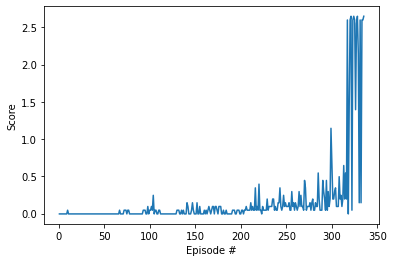

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores_mean)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Both agents separate

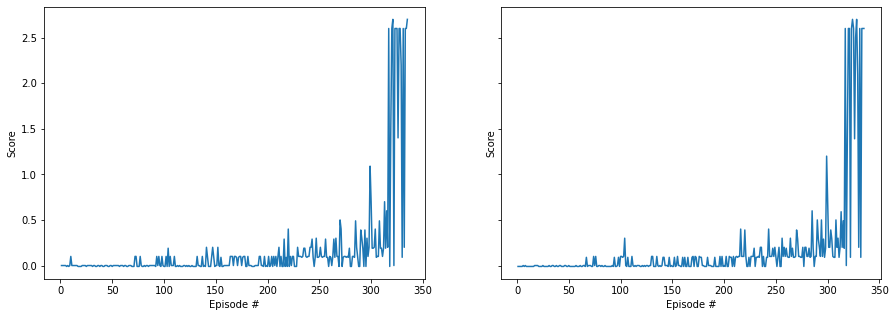

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

axs = axs.flatten()
for idx, (ax, score) in enumerate(zip(axs, np.transpose(scores))):
    ax.plot(np.arange(1, len(scores)+1), score)
    ax.set_ylabel('Score')
    ax.set_xlabel('Episode #')

plt.show()

In [11]:
env.close()